In [5]:
#importing pkg
import collections
from collections import OrderedDict
from matplotlib import pyplot as plt
from matplotlib import cm
import pylab
import math
import cv2

#importing fasta file NC_012920.1 Homo sapiens mitochondrion
f = open("COP1.FASTA")
#reading the file
s1 = f.read()
#storing the data into one single string
data = "".join(s1.split("\n")[1:])
 
# count_kmer function splits the data string into dictionary of k-mer with its frequencies     
def count_kmers(sequence, k):
    """ The Python defaultdict type behaves almost exactly like a regular Python dictionary,
    but if you try to access or modify a missing key, then defaultdict will automatically
    create the key and generate a default value for it. 
    This makes defaultdict a valuable option for handling missing keys in dictionaries."""
    d = collections.defaultdict(int)
    for i in range(len(data)-(k-1)):
        # storing the k-mer and its corresponding frequency in d 
        d[sequence[i:i+k]] +=1 
        
    """for i in d.copy():
        if "N" in i:
            del d[i]"""
    return d
# finding the probability of each kmer 
def probabilities(kmer_count, k):
    probabilities = collections.defaultdict(float)
    N = len(data)
    for key, value in kmer_count.items():
        # probability = freq(kmer)/total number of kmer 
        probabilities[key] = float(value) / (N - k + 1)
    return probabilities



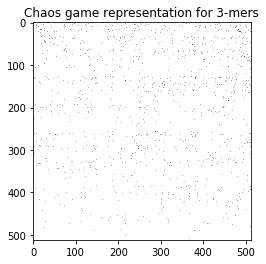

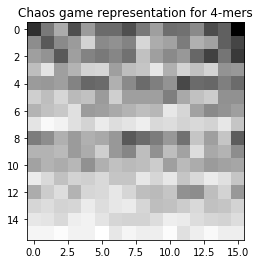

In [7]:
def chaos_game_representation(probabilities, k):
    array_size = int(math.sqrt(4**k))
    chaos = []
    for i in range(array_size):
        chaos.append([0]*array_size)
 
    maxx = int(array_size)
    maxy = int(array_size)
    posx = 1
    posy = 1
    for key, value in probabilities.items():
        for char in key:
            if char == "T":
                posx += int(maxx / 2)
            elif char == "C":
                posy += int(maxy / 2)
            elif char == "G":
                posx += int(maxx / 2)
                posy += int(maxy / 2)
            maxx = maxx / 2
            maxy /= 2
        chaos[posy-1][posx-1] = value
        maxx = array_size
        maxy = array_size
        posx = 1
        posy = 1
 
    return chaos
f3 = count_kmers(data, 9)
f4 = count_kmers(data, 4)
 
f3_prob = probabilities(f3, 9)
f4_prob = probabilities(f4, 4)
 
chaos_k3 = chaos_game_representation(f3_prob, 9)
pylab.title('Chaos game representation for 3-mers')
pylab.imshow(chaos_k3, interpolation='nearest', cmap=cm.gray_r)
pylab.show()
 
chaos_k4 = chaos_game_representation(f4_prob, 4)
pylab.title('Chaos game representation for 4-mers')
pylab.imshow(chaos_k4, interpolation='nearest', cmap=cm.gray_r)
pylab.show()

In [ ]:
#count_kmers(data, 4)